## Using Machine Learning
This method doesn't seem to work
Mababa masyado ang accuracy.

### Importing the Modules

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, auc, classification_report
)

import joblib

is_parent = False

### Preparing and Splitting the Dataset

In [2]:
if is_parent is False:
    os.chdir('..')
is_parent = True
print('Current Working Directory:', os.getcwd())

# Import the Data
df = pd.read_csv('public\\Cleaned_Viral_Social_Media_Trends_FINAL.csv')

# Split the data based on the features
features = ['Hashtag', 'Content_Type', 'Region', 'ERR_Level']
X = df[features] # Features
y = df[['Platform']] # Target variable (2 class)

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

X_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
y_encoder = LabelEncoder()

X_train = X_encoder.fit_transform(X_train)
X_test = X_encoder.transform(X_test)
y_train = y_encoder.fit_transform(y_train)
y_test = y_encoder.transform(y_test)

print(X_train[0:6])
print(y_train[0:6])

Current Working Directory: c:\Users\Waks\Downloads\USEP BSCS\School Work\BSCS 3 - 1st Sem\CSDS 313 - Business Intelligence\Learning Evidence\social-media-dashboard-bi
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 1. 0. 0.]]
[1 1 2 0 1 2]


C:\Users\Waks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Waks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


### Training the models

#### Define paths and functions

In [3]:
def heatmap(cm):
    fig, ax = plt.subplots(figsize=(8, 6))
    plot = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)
    plt.title('0 = Press | 1 = Hover')
    return plot

model_path = 'model_training\\saved_models'

#### Decision Tree

[2 2 0 2 3 3]
[1 1 2 3 1 2]
Decision Tree Model Accuracy: 0.24
0.5108135196037182
              precision    recall  f1-score   support

           0       0.26      0.33      0.29       222
           1       0.25      0.30      0.27       220
           2       0.22      0.18      0.20       246
           3       0.21      0.15      0.18       240

    accuracy                           0.24       928
   macro avg       0.23      0.24      0.23       928
weighted avg       0.23      0.24      0.23       928

[[74 54 46 48]
 [58 65 48 49]
 [84 73 45 44]
 [72 67 64 37]]


<Axes: title={'center': '0 = Press | 1 = Hover'}>

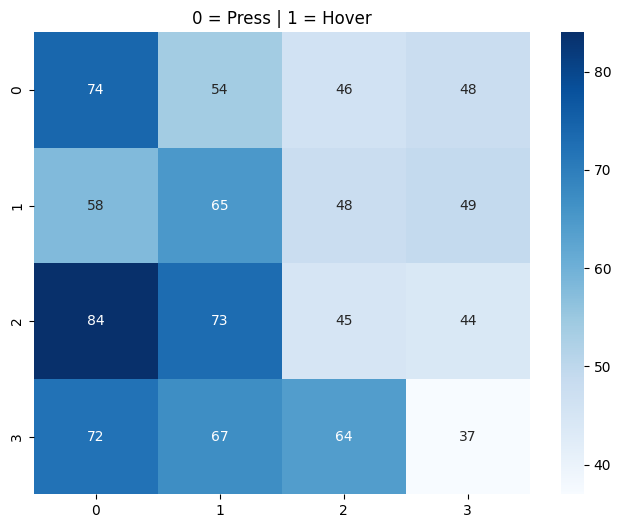

In [9]:
dt_model = DecisionTreeClassifier(random_state=77)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print(dt_pred[0:6])
print(y_test[0:6])

print(f"Decision Tree Model Accuracy: {accuracy_score(y_test, dt_pred):.2f}")
print(roc_auc_score(y_test, dt_model.predict_proba(X_test), multi_class='ovr', average='weighted'))
print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
heatmap(confusion_matrix(y_test, dt_pred))


#### SVM

SVM Model Accuracy: 0.23
0.5127983052342554
              precision    recall  f1-score   support

           0       0.22      0.12      0.16       222
           1       0.21      0.12      0.16       220
           2       0.00      0.00      0.00       246
           3       0.24      0.68      0.35       240

    accuracy                           0.23       928
   macro avg       0.17      0.23      0.17       928
weighted avg       0.17      0.23      0.17       928



C:\Users\Waks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Waks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Waks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

<Axes: title={'center': '0 = Press | 1 = Hover'}>

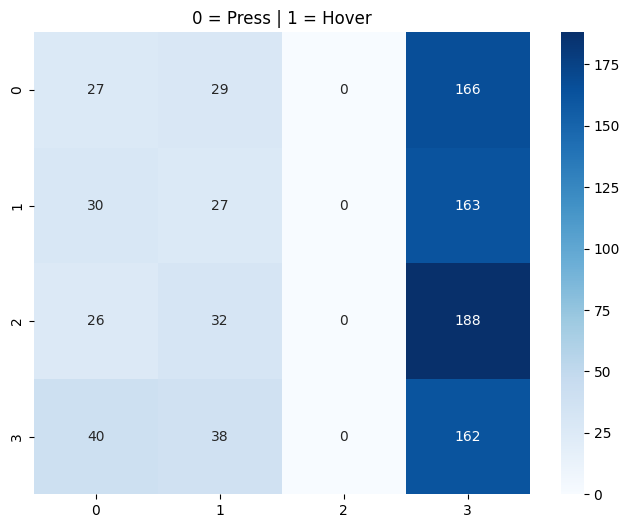

In [12]:
svm_sample = SVC(C=1, kernel='rbf', gamma='auto', degree=2, random_state=777, probability=True)
svm_sample.fit(X_train, y_train)
svm_pred = svm_sample.predict(X_test)
print(f"SVM Model Accuracy: {accuracy_score(y_test, svm_pred):.2f}")
print(roc_auc_score(y_test, svm_sample.predict_proba(X_test), multi_class='ovr', average='weighted'))
print(classification_report(y_test, svm_pred))
heatmap(confusion_matrix(y_test, svm_pred))
# with open(f'{model_path}\\svm_model_100_rbg_scale.pkl', 'wb') as file:
#     # pickle.dump(object, file_stream)
#     pickle.dump(svm_sample, file)

#### Random Forest

Random Forest Model Accuracy: 0.26
              precision    recall  f1-score   support

           0       0.26      0.24      0.25       222
           1       0.26      0.26      0.26       220
           2       0.27      0.27      0.27       246
           3       0.23      0.24      0.24       240

    accuracy                           0.26       928
   macro avg       0.26      0.26      0.26       928
weighted avg       0.26      0.26      0.26       928

0.5101330308476091


<Axes: title={'center': '0 = Press | 1 = Hover'}>

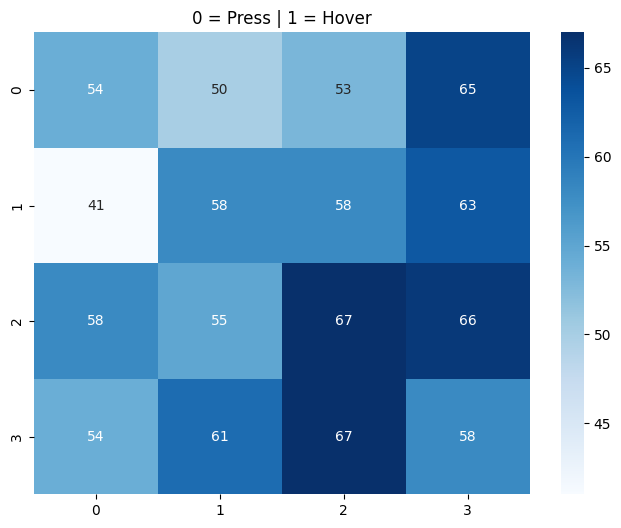

In [14]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=77)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(f"Random Forest Model Accuracy: {accuracy_score(y_test, rf_pred):.2f}")
print(classification_report(y_test, rf_pred))
print(roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr', average='weighted'))
heatmap(confusion_matrix(y_test, rf_pred))
# with open(f'{model_path}\\rf_model.pkl', 'wb') as file:
#     # pickle.dump(object, file_stream)
#     pickle.dump(rf_model, file)

# Using Feature Engineering

### Creating the Decayed_ERR

In [ ]:
# Data Frame to be used for Feature Engineering
new_df = df[['Post_Date', 'Platform', 'Hashtag', 'Content_Type', 'Region', 'ERR%', "ERR_Level"]]
new_df.info()
new_df['Post_Date'] = pd.to_datetime(new_df.loc[:, 'Post_Date'])


# Creating an annotated version of the ERR (Decreases the ERR based on how old the post is. Uses days as its metric)
max_date = new_df['Post_Date'].max()
new_df['Distance_Time_Delta'] = max_date - pd.to_datetime(df['Post_Date'])
new_df['Dist_Days'] = new_df['Distance_Time_Delta'].dt.days
new_df = new_df.drop('Distance_Time_Delta', axis=1)

exponential_decay = 0.003
new_df['Decayed_ERR'] = new_df['ERR%'] * (2.7182818284590452353602874713527 ** (-exponential_decay * new_df['Dist_Days']))
new_df.head()
new_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4637 entries, 0 to 4636
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Post_Date     4637 non-null   object 
 1   Platform      4637 non-null   object 
 2   Hashtag       4637 non-null   object 
 3   Content_Type  4637 non-null   object 
 4   Region        4637 non-null   object 
 5   ERR%          4637 non-null   float64
 6   ERR_Level     4637 non-null   object 
dtypes: float64(1), object(6)
memory usage: 253.7+ KB


<positron-console-cell-25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-25>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-25>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Index(['Post_Date', 'Platform', 'Hashtag', 'Content_Type', 'Region', 'ERR%', 'ERR_Level', 'Dist_Days', 'Decayed_ERR'], dtype='object')

### Creating the Data Aggregations

In [ ]:
aggregated_df = new_df.groupby(['Platform', 'Hashtag', 'Content_Type', 'Region']) \
    .mean() \
    .reset_index() \
    [['Platform', 'Hashtag', 'Content_Type', 'Region', 'Decayed_ERR']] \
    .sort_values(by='Decayed_ERR', ascending=False)

# Example of using the Content Picker
aggregated_df[
    (aggregated_df['Hashtag'] == '#Fitness') &
    (aggregated_df['Region'] == 'Germany') &
    (aggregated_df['Content_Type'] == 'Shorts')
].sort_values('Decayed_ERR', ascending=False)[['Platform', 'Decayed_ERR']]

aggregated_df.to_csv('public\\For_Platform_Predicting.csv', index=False)

TypeError: agg function failed [how->mean,dtype->object]